# Detecting Breast Cancer

Importing the Libraries

In [5]:
import pandas as pd # Used to loading files
import numpy as np # Operate with mathematical operations
import matplotlib.pyplot as plt # Used for plotting
import seaborn as sns  # Used for visualizing

Reading the dataset

In [11]:
data = pd.read_csv("cancer.csv") # reading csv file

In [12]:
data.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Counting the distinct values in Diagnosis column

In [14]:
data['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

Visualizing the Diagnosis Column

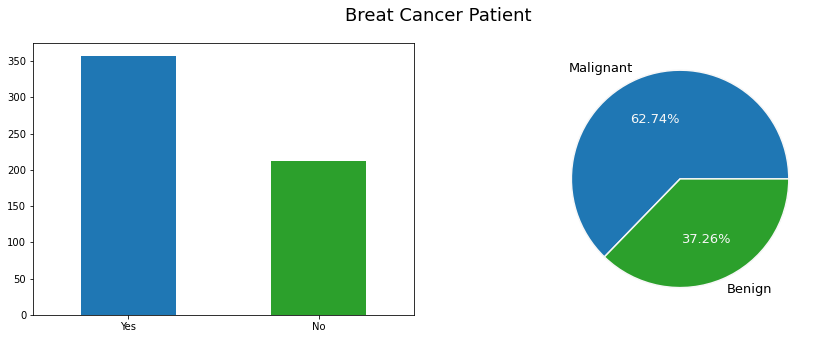

In [18]:
f, ax = plt.subplots(1, 2, figsize = (15,5))
f.suptitle("Breat Cancer Patient", fontsize = 18.)
_ = data.diagnosis.value_counts().plot.bar(ax = ax[0], rot = 0, color = (sns.color_palette()[0], sns.color_palette()[2])).set(xticklabels = ["Yes", "No"])
_ = data.diagnosis.value_counts().plot.pie(labels = ("Malignant","Benign"), autopct = "%.2f%%", label = "", fontsize = 13., ax = ax[1],\
colors = (sns.color_palette()[0], sns.color_palette()[2]), wedgeprops = {"linewidth": 1.5, "edgecolor": "#F7F7F7"}), ax[1].texts[1].set_color("#F7F7F7"), ax[1].texts[3].set_color("#F7F7F7")

Encoding the diagnosis column into categorical 

In [22]:
from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
data.iloc[:,1] = labelencoder_Y.fit_transform(data.iloc[:,1].values)

In [24]:
data.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [27]:
data.corr()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,1.000000,0.039769,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,...,0.082405,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866
diagnosis,0.039769,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.074626,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.099770,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.073159,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.096893,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,-0.012968,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.000096,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.050080,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.044158,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661


In [36]:
X_Data = data.iloc[:,2:31].values
Y_Data = data.iloc[:,1].values

Splitting data into training and testing 

In [38]:
from sklearn import model_selection
# 0.3 means 30% will be used for testing and 0.7 or 70% data will be used for training
X_Train, X_Test, Y_Train, Y_Test = model_selection.train_test_split(X_Data, Y_Data, test_size = 0.3)


In [39]:
print("Sample in training set...", X_Train.shape)
print("Sample in testing set...", X_Test.shape)
print("Sample in training set...", Y_Train.shape)
print("Sample in testing set...", Y_Test.shape)

Sample in training set... (398, 29)
Sample in testing set... (171, 29)
Sample in training set... (398,)
Sample in testing set... (171,)


In [40]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [41]:
knnClassifier = KNeighborsClassifier()
knnClassifier.fit(X_Train, Y_Train)
Y_Pred = knnClassifier.predict(X_Test)
print(confusion_matrix(Y_Test, Y_Pred))
print(classification_report(Y_Test,Y_Pred))
accuracy = accuracy_score(Y_Test,Y_Pred)
print("Accuracy of KNN...", accuracy)

[[113   2]
 [  6  50]]
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       115
           1       0.96      0.89      0.93        56

    accuracy                           0.95       171
   macro avg       0.96      0.94      0.95       171
weighted avg       0.95      0.95      0.95       171

Accuracy of KNN... 0.9532163742690059


In [42]:
dtreeClassifier = DecisionTreeClassifier()
dtreeClassifier.fit(X_Train, Y_Train)
Y_Pred = dtreeClassifier.predict(X_Test)
print(confusion_matrix(Y_Test, Y_Pred))
print(classification_report(Y_Test,Y_Pred))
accuracy = accuracy_score(Y_Test,Y_Pred)
print("Accuracy of Decision Tree...", accuracy)

[[106   9]
 [  7  49]]
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       115
           1       0.84      0.88      0.86        56

    accuracy                           0.91       171
   macro avg       0.89      0.90      0.89       171
weighted avg       0.91      0.91      0.91       171

Accuracy of Decision Tree... 0.9064327485380117


In [43]:
sgdClassifier = SGDClassifier()
sgdClassifier.fit(X_Train, Y_Train)
Y_Pred = sgdClassifier.predict(X_Test)
print(confusion_matrix(Y_Test, Y_Pred))
print(classification_report(Y_Test,Y_Pred))
accuracy = accuracy_score(Y_Test,Y_Pred)
print("Accuracy of SGD...", accuracy)

[[112   3]
 [  7  49]]
              precision    recall  f1-score   support

           0       0.94      0.97      0.96       115
           1       0.94      0.88      0.91        56

    accuracy                           0.94       171
   macro avg       0.94      0.92      0.93       171
weighted avg       0.94      0.94      0.94       171

Accuracy of SGD... 0.9415204678362573


In [44]:
svmClassifier = SVC(kernel='linear')
svmClassifier.fit(X_Train, Y_Train)
Y_Pred = svmClassifier.predict(X_Test)
print(confusion_matrix(Y_Test, Y_Pred))
print(classification_report(Y_Test,Y_Pred))
accuracy = accuracy_score(Y_Test,Y_Pred)
print("Accuracy of SVM...", accuracy)

[[112   3]
 [  6  50]]
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       115
           1       0.94      0.89      0.92        56

    accuracy                           0.95       171
   macro avg       0.95      0.93      0.94       171
weighted avg       0.95      0.95      0.95       171

Accuracy of SVM... 0.9473684210526315


# Comparison of Machine Learning Classifiers

The K Nearest Neighbor Classifier well performed among other classifiers. It means that given predictor will accurately guess the value of predicted attribute for a new data.

In [45]:
Classifier = [['KNN', 95.3],['DT', 90.6 ],['SGD', 94.1 ],['SVM', 94.7] ]
result = pd.DataFrame(Classifier, columns = ['Classifier', 'Accuracy']) 
result.head()

,Classifier,Accuracy
0,KNN,95.3
1,DT,90.6
2,SGD,94.1
3,SVM,94.7


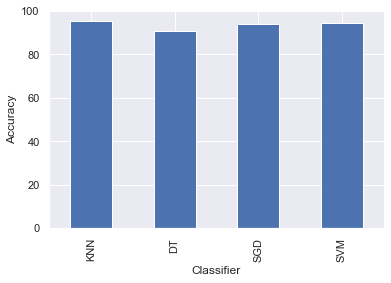

In [46]:
Accuracy = result['Accuracy'].values
Classifier = result['Classifier'].values
sns.set(style='darkgrid')
ax = result.plot(x="Classifier", y="Accuracy", kind="bar")
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
ax.get_legend().remove()
plt.show()